In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import geopandas as gpd
import contextily as ctx

import os
data_pth = "../Data/"

In [49]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [50]:
world.crs

{'init': 'epsg:4326'}

In [51]:
# GeoPandas comes with city data, but its just the capital cities, so I'll load in my own
cities = gpd.read_file(os.path.join(data_pth, "ne_10m_populated_places.shp"))

In [52]:
cities.crs

{'init': 'epsg:4326'}

In [53]:
cities.head()

NAME ADM0NAME    POP                     geometry
0  Colonia del Sacramento  Uruguay  21714  POINT (-57.84000 -34.48000)
1                Trinidad  Uruguay  21093  POINT (-56.90100 -33.54400)
2             Fray Bentos  Uruguay  23279  POINT (-58.30400 -33.13900)
3               Canelones  Uruguay  19698  POINT (-56.28400 -34.53800)
4                 Florida  Uruguay  32234  POINT (-56.21500 -34.09900)

In [54]:
Pittsburgh = cities.loc[cities['NAME'] == 'Pittsburgh']

In [55]:
Pitts_citybndry = gpd.read_file(os.path.join(data_pth, "Pittsburgh_City_Boundary.shp"))

In [56]:
Pitts_citybndry.crs

{'init': 'epsg:4326'}

In [57]:
Pitts_citybndry.head()

OBJECTID          AREA      PERIMETER  BOUNDARY_  BOUNDARY_I  \
0         1  2.390814e+08   80995.806272          2           3   
1         2  7.809345e+06   13583.073713          3           4   
2         3  6.633454e+08  136797.979285          4           1   
3         4  6.426495e+06   13292.970311          5           5   
4         5  2.125020e+06    8998.423032          6           6   

      Shape_Leng                                           geometry  
0   80995.807740  POLYGON ((-80.05148 40.48350, -80.04982 40.484...  
1   13583.073648  POLYGON ((-79.90150 40.48744, -79.90155 40.488...  
2  136797.978549  POLYGON ((-79.88404 40.48246, -79.88417 40.481...  
3   13292.970433  POLYGON ((-80.04105 40.46395, -80.04080 40.463...  
4    8998.422498  POLYGON ((-79.97453 40.46628, -79.97462 40.466...

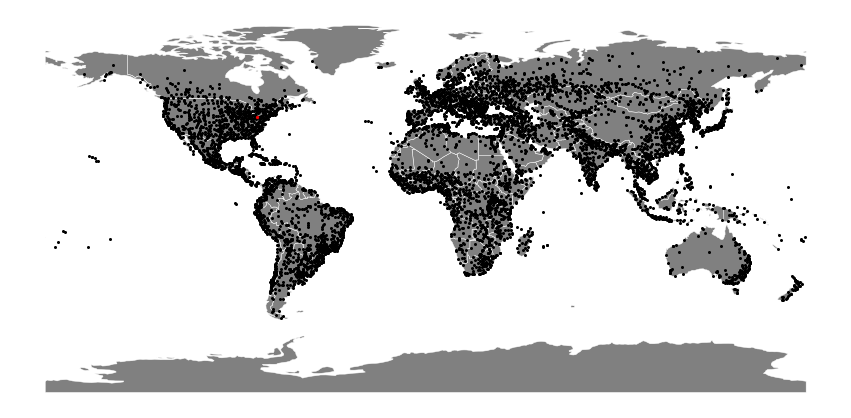

In [58]:
base = world.plot(color='grey', linewidth=0.5, edgecolor='white', figsize=(15,10))
cities.plot(ax=base, color='black', markersize=4)
Pittsburgh.plot(ax=base, color='red', markersize=5)
base.set_axis_off()

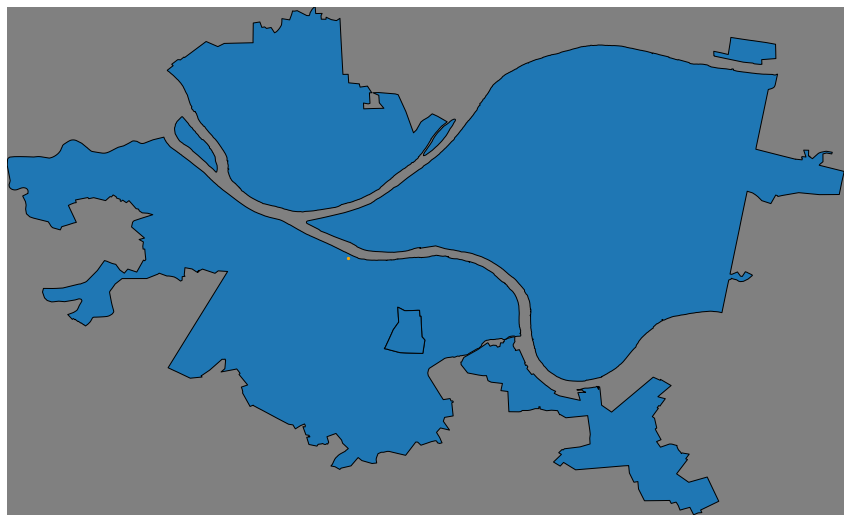

In [59]:
base = world.plot(color='grey', linewidth=0.5, edgecolor='white', figsize=(15,10))
Pitts_citybndry.plot(ax=base, edgecolor='black')
Pittsburgh.plot(ax=base, color='orange', markersize=5)

bounds = Pitts_citybndry.geometry.bounds
plt.xlim([bounds.minx.min(), bounds.maxx.max()])
plt.ylim([bounds.miny.min(), bounds.maxy.max()])
base.set_axis_off()

In [60]:
POI_df = pd.DataFrame(
    {'Name': ['David L. Lawrence Convention Center', 
              'Phipps Conservatory',
              'Carnegie Museum of Natural History', 
              'Carnegie Science Center', 
              'Cathedral of Learning',
              'Frick Art and Historical Center',
              'Duquesne Incline',
              'Pittsburgh Zoo & PPG Aquarium',
              'Strip District',
              'Point State Park',
              'Andy Warhol Museum',
              'Carnegie Museum of Art'],
     'Latitude': [40.4458, 40.4392, 40.4434, 40.4456, 40.4443, 40.4475, 40.4399, 40.4832, 40.4534, 40.4416, 40.4484, 40.4437],
     'Longitude': [-79.9962, -79.9474, -79.9507, -80.0182, -79.9532, -79.9018, -80.0176, -79.9213, -79.9807, -80.0079, -80.0025, -79.9490]})

POI_gdf = gpd.GeoDataFrame(
    POI_df, geometry=gpd.points_from_xy(POI_df.Longitude, POI_df.Latitude))

#POI_gdf.crs = "EPSG:4326"
POI_gdf.crs = {'init': 'epsg:4326'}

In [61]:
POI_gdf.crs

{'init': 'epsg:4326'}

In [62]:
print(POI_gdf.head())

                                  Name  Latitude  Longitude  \
0  David L. Lawrence Convention Center   40.4458   -79.9962   
1                  Phipps Conservatory   40.4392   -79.9474   
2   Carnegie Museum of Natural History   40.4434   -79.9507   
3              Carnegie Science Center   40.4456   -80.0182   
4                Cathedral of Learning   40.4443   -79.9532   

                     geometry  
0  POINT (-79.99620 40.44580)  
1  POINT (-79.94740 40.43920)  
2  POINT (-79.95070 40.44340)  
3  POINT (-80.01820 40.44560)  
4  POINT (-79.95320 40.44430)  


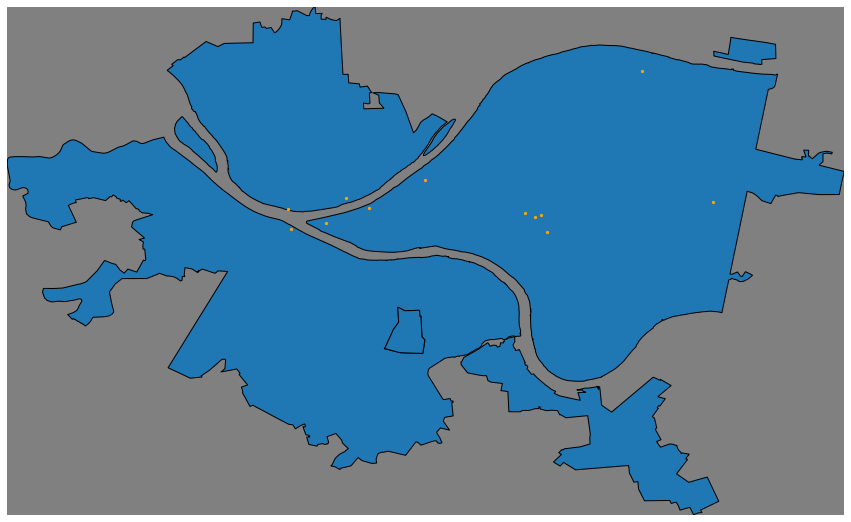

In [63]:
base = world.plot(color='grey', linewidth=0.5, edgecolor='white', figsize=(15,10))
Pitts_citybndry.plot(ax=base, edgecolor='black')
POI_gdf.plot(ax=base, color='orange', markersize=5)

bounds = Pitts_citybndry.geometry.bounds
plt.xlim([bounds.minx.min(), bounds.maxx.max()])
plt.ylim([bounds.miny.min(), bounds.maxy.max()])
base.set_axis_off()

In [64]:
world = world.to_crs(epsg=3857)
cities = cities.to_crs(epsg=3857)
Pitts_citybndry = Pitts_citybndry.to_crs(epsg=3857)
Pittsburgh = Pittsburgh.to_crs(epsg=3857)
POI_gdf = POI_gdf.to_crs(epsg=3857)

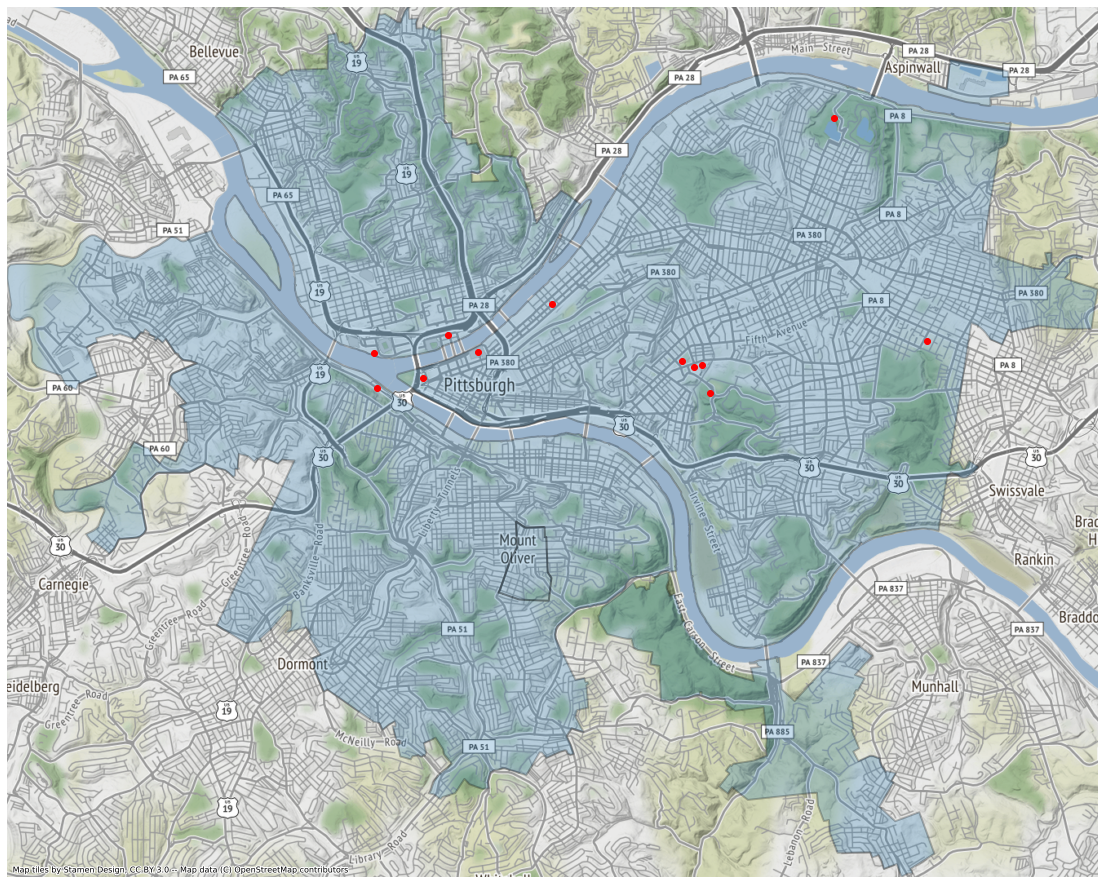

In [65]:
fig, ax = plt.subplots(figsize = (20,16)) 

Pitts_citybndry.plot(edgecolor='black', alpha = 0.25, linewidth = 2, ax=ax)
ctx.add_basemap(ax)

POI_gdf.plot(ax=ax,color='red')
bounds = Pitts_citybndry.geometry.bounds

#for x, y, label in zip(POI_gdf.geometry.x, POI_gdf.geometry.y, POI_gdf.Name):
#    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

plt.xlim([bounds.minx.min(), bounds.maxx.max()])
plt.ylim([bounds.miny.min(), bounds.maxy.max()])
ax.set_axis_off()

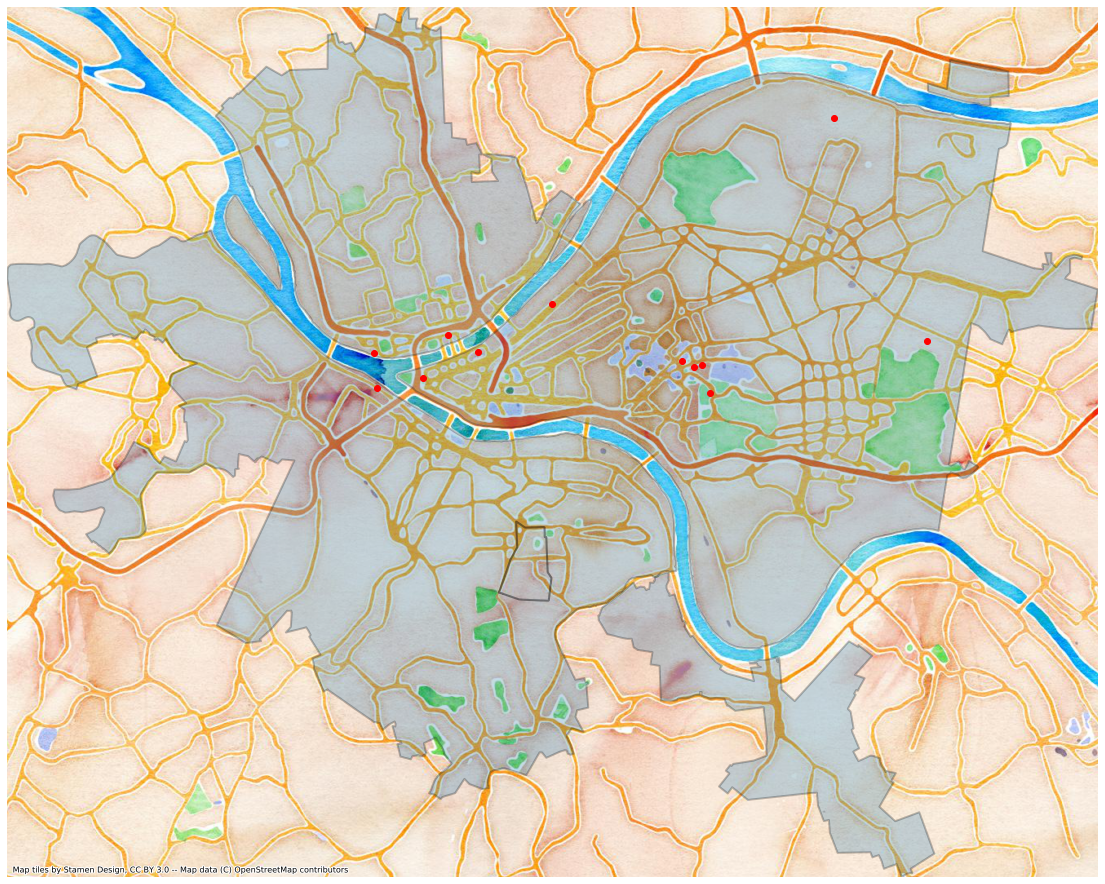

In [66]:
fig, ax = plt.subplots(figsize = (20,16)) 

Pitts_citybndry.plot(edgecolor='black', alpha = 0.25, linewidth = 2, ax=ax)
ctx.add_basemap(ax,url=ctx.providers.Stamen.Watercolor)

POI_gdf.plot(ax=ax,color='red')
bounds = Pitts_citybndry.geometry.bounds

#for x, y, label in zip(POI_gdf.geometry.x, POI_gdf.geometry.y, POI_gdf.Name):
#    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

plt.xlim([bounds.minx.min(), bounds.maxx.max()])
plt.ylim([bounds.miny.min(), bounds.maxy.max()])
ax.set_axis_off()

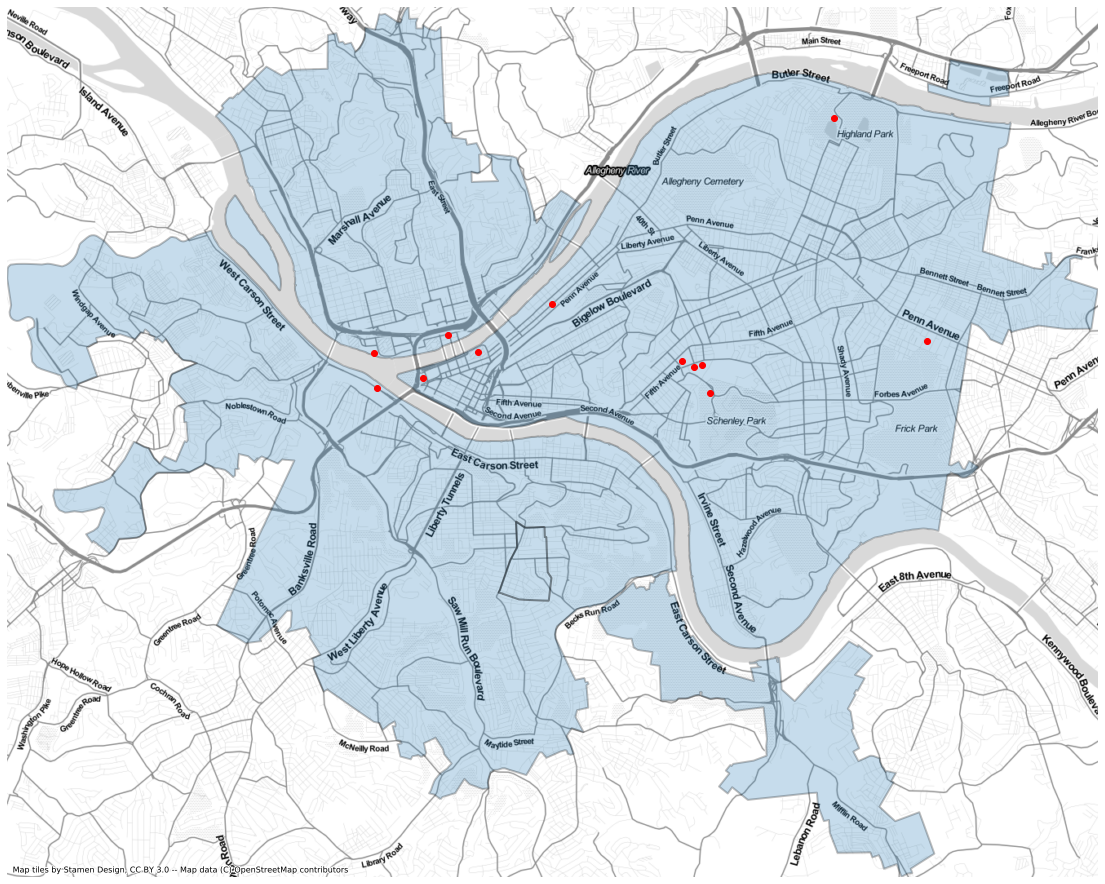

In [67]:
fig, ax = plt.subplots(figsize = (20,16)) 

Pitts_citybndry.plot(edgecolor='black', alpha = 0.25, linewidth = 2, ax=ax)
ctx.add_basemap(ax,url=ctx.providers.Stamen.TonerLite)

POI_gdf.plot(ax=ax,color='red')
bounds = Pitts_citybndry.geometry.bounds

#for x, y, label in zip(POI_gdf.geometry.x, POI_gdf.geometry.y, POI_gdf.Name):
#    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

plt.xlim([bounds.minx.min(), bounds.maxx.max()])
plt.ylim([bounds.miny.min(), bounds.maxy.max()])
ax.set_axis_off()

In [80]:
Conv_center = POI_gdf[POI_gdf.Name == 'David L. Lawrence Convention Center']

In [81]:
Conv_center

Name  Latitude  Longitude  \
0  David L. Lawrence Convention Center   40.4458   -79.9962   

                           geometry  
0  POINT (-8905136.249 4930937.779)

In [69]:
buf = POI_gdf.buffer(2500, resolution=16)

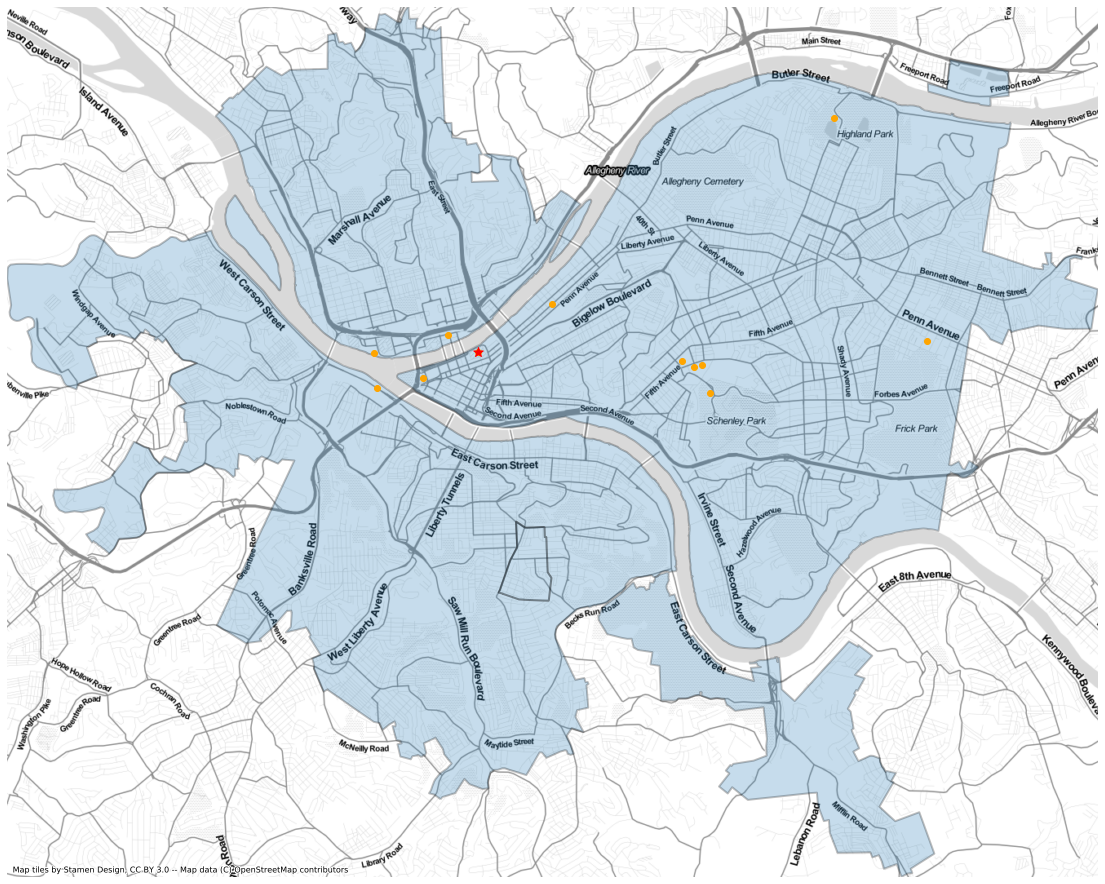

In [86]:
fig, ax = plt.subplots(figsize = (20,16)) 

Pitts_citybndry.plot(edgecolor='black', alpha = 0.25, linewidth = 2, ax=ax)
ctx.add_basemap(ax,url=ctx.providers.Stamen.TonerLite)

POI_gdf.plot(ax=ax,color='orange')
Conv_center.plot(ax=ax,color='red', marker = '*', markersize = 100)
bounds = Pitts_citybndry.geometry.bounds

plt.xlim([bounds.minx.min(), bounds.maxx.max()])
plt.ylim([bounds.miny.min(), bounds.maxy.max()])
ax.set_axis_off()